### Agent-Lab: Adaptive RAG Agent

---

In [1]:
import os
os.chdir('..')

from langchain import globals
from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# enable langchain debug
globals.set_debug(True)

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/starlette/formparsers.py:12: PendingDeprecationWarning: Please use `import python_multipart` instead.
  import multipart
Overriding of current TracerProvider is not allowed
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/pydantic/_internal/_config.py:295: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/pydantic/_internal/_config.py:295: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWa

In [2]:
# create ollama agent
agent_id = experiment_utils.create_ollama_agent(agent_type="adaptive_rag", llm_tag="mistral-small:24b", ollama_endpoint="http://jupiter.btech.software:11434")

In [3]:
# get agent instance
adaptive_rag_agent = container.adaptive_rag_agent()

# Create Graph
workflow_builder = adaptive_rag_agent.get_workflow_builder(agent_id)
workflow = workflow_builder.compile()

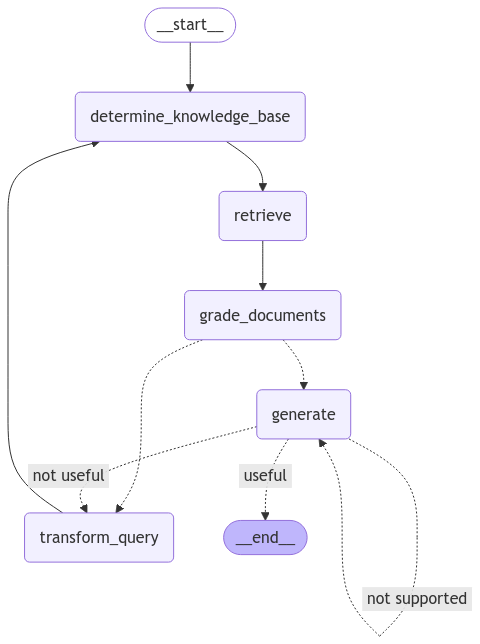

In [4]:
experiment_utils.print_graph(workflow)

In [5]:
message = MessageRequest(
    message_role="human",
    message_content="Explain what is the pinnacle of skill according to the Art of War Book",
    agent_id=agent_id
)
inputs = adaptive_rag_agent.get_input_params(message)

In [6]:
# get document repository instance
# document_repository = container.document_repository()

# populate vectorstore with documents
# experiment_utils.create_static_document(
#     embeddings_model=adaptive_rag_agent.get_embeddings_model(agent_id),
#     document_repository=document_repository,
#     file_path="tests/integration/sun_tzu_the_art_of_war.zip"
# )

In [7]:
result = workflow.invoke(inputs)
print(result['generation'])

[chain/start] [chain:LangGraph] Entering Chain run with input:
{
  "agent_id": "96af04e5-fa85-4a1b-853a-b795e4edeaae",
  "query": "Explain what is the pinnacle of skill according to the Art of War Book",
  "preparation_system_prompt": "You are an expert at routing a user question to a knowledge_base or web search.\nThe knowledge_base contains documents that can help replying effectively input query {query}.\nUse the knowledge_base for questions on these topics.\nNo explanation necessary only selection.\nYou are not supposed to answer user query, you are supposed to select *exactly one* of the\nfollowing items that best match the input query:\n- \"static_document_data\"\n- \"temporal_financial_data\"\n- \"backend_api_data\"",
  "execution_system_prompt": "You are an assistant for question-answering tasks. Use the following pieces of retrieved\ncontext to answer the question. If you don't know the answer, just say that you don't know.\nUse three sentences maximum and keep the answer conc

2025-02-05 13:36:15,027 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/langgraph/utils/runnable.py:219: ResourceWarning: unclosed <socket.socket fd=64, family=2, type=1, proto=6, laddr=('192.168.2.198', 41138), raddr=('192.168.2.194', 11434)>
  ret = context.run(self.func, input, **kwargs)


[llm/end] [chain:LangGraph > chain:determine_knowledge_base > chain:RunnableSequence > llm:ChatOllama] [4.79s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:36:15.079055Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 4507490292,
          "load_duration": 888779917,
          "prompt_eval_count": 200,
          "prompt_eval_duration": 2262000000,
          "eval_count": 19,
          "eval_duration": 975000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],


2025-02-05 13:36:16,472 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/embed "HTTP/1.1 200 OK"
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/langgraph/utils/runnable.py:219: ResourceWarning: unclosed <socket.socket fd=65, family=2, type=1, proto=6, laddr=('192.168.2.198', 34146), raddr=('192.168.2.194', 11434)>
  ret = context.run(self.func, input, **kwargs)


[chain/start] [chain:LangGraph > chain:retrieve > chain:ChannelWrite<...,retrieve>] Entering Chain run with input:
[inputs]
[chain/end] [chain:LangGraph > chain:retrieve > chain:ChannelWrite<...,retrieve>] s] Exiting Chain run with output:
[outputs]
[chain/end] [chain:LangGraph > chain:retrieve] [1.40s] Exiting Chain run with output:
[outputs]
[chain/start] [chain:LangGraph > chain:grade_documents] Entering Chain run with input:
[inputs]
[chain/start] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence] Entering Chain run with input:
{
  "query": "Explain what is the pinnacle of skill according to the Art of War Book",
  "document": "Do not press a desperate foe too hard.\n\n[Ch’en Hao quotes the saying: \"Birds and beasts when brought to bay will use their claws and teeth.\" Chang Yu says: \"If your adversary has burned his boats and destroyed his cooking-pots, and is ready to stake all on the issue of a battle, he must not be pushed to extremities.\" Ho Shih illustrates

2025-02-05 13:36:27,544 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [11.03s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:36:27.603014Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 11019815666,
          "load_duration": 32355500,
          "prompt_eval_count": 1159,
          "prompt_eval_duration": 10053000000,
          "eval_count": 17,
          "eval_duration": 925000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
      

2025-02-05 13:36:35,082 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [7.53s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:36:35.139854Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 7520686666,
          "load_duration": 20258250,
          "prompt_eval_count": 967,
          "prompt_eval_duration": 6584000000,
          "eval_count": 17,
          "eval_duration": 909000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          

2025-02-05 13:36:43,684 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.59s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:36:43.740567Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8587318208,
          "load_duration": 15346292,
          "prompt_eval_count": 1068,
          "prompt_eval_duration": 7592000000,
          "eval_count": 18,
          "eval_duration": 972000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:36:52,684 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [9.00s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:36:52.742291Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8993475708,
          "load_duration": 14019375,
          "prompt_eval_count": 1110,
          "prompt_eval_duration": 8051000000,
          "eval_count": 17,
          "eval_duration": 920000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:37:00,946 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.25s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:37:01.004181Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8248510417,
          "load_duration": 15160833,
          "prompt_eval_count": 1033,
          "prompt_eval_duration": 7249000000,
          "eval_count": 18,
          "eval_duration": 977000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:37:09,564 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.62s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:37:09.622598Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8609246333,
          "load_duration": 15234542,
          "prompt_eval_count": 1083,
          "prompt_eval_duration": 7668000000,
          "eval_count": 17,
          "eval_duration": 918000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:37:18,158 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.59s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:37:18.217208Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8585884708,
          "load_duration": 14583458,
          "prompt_eval_count": 1060,
          "prompt_eval_duration": 7587000000,
          "eval_count": 18,
          "eval_duration": 977000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:37:26,804 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.64s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:37:26.862699Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8639243959,
          "load_duration": 13747459,
          "prompt_eval_count": 1082,
          "prompt_eval_duration": 7643000000,
          "eval_count": 18,
          "eval_duration": 975000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:37:35,752 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.94s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:37:35.810528Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8942325208,
          "load_duration": 14073708,
          "prompt_eval_count": 1097,
          "prompt_eval_duration": 7998000000,
          "eval_count": 17,
          "eval_duration": 923000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:37:44,734 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/json/__init__.py:238: ResourceWarning: unclosed <socket.socket fd=65, family=2, type=1, proto=6, laddr=('192.168.2.198', 34150), raddr=('192.168.2.194', 11434)>
  **kw).encode(obj)


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.98s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:37:44.791719Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8974539583,
          "load_duration": 14125208,
          "prompt_eval_count": 1092,
          "prompt_eval_duration": 8037000000,
          "eval_count": 17,
          "eval_duration": 915000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:38:02,296 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:generate > chain:RunnableSequence > llm:ChatOllama] [40.92s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "The concept of \"desperate ground\" or \"difficult terrain\" in military strategy refers to a situation where an army finds itself in a position from which it cannot easily retreat. This type of terrain forces the army to fight with determination because there is no viable option for withdrawal.\n\nIn the context of Sun Tzu's *The Art of War*, difficult terrain is one of several types of ground that can influence military strategy and tactics. Here are some key points about desperate or difficult ground:\n\n1. **No Retreat Option**: When an army is on desperate ground, it has its back to a natural barrier such as a river, mountain, or cliff, making retreat impossible.\n\n2. **Fight with Determination**: Because there is no way out except through the enemy lines, soldiers are compelled to fight with extreme resol

/home/bsantanna/anaconda3/envs/dev/lib/python3.11/abc.py:123: ResourceWarning: unclosed <socket.socket fd=64, family=2, type=1, proto=6, laddr=('192.168.2.198', 33502), raddr=('192.168.2.194', 11434)>
  return _abc_subclasscheck(cls, subclass)
2025-02-05 13:39:37,372 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:generate > chain:grade_generation_v_documents_and_question > chain:RunnableSequence > llm:ChatOllama] [71.45s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "The concept of \"desperate ground\" or \"difficult terrain\" is indeed a critical aspect of military strategy, as you've outlined. Let's delve deeper into how this concept aligns with Sun Tzu's principles from *The Art of War* and explore its broader implications.\n\n### Key Points on Desperate Ground\n\n1. **No Retreat Option**:\n   - **Natural Barriers**: As mentioned, natural barriers like rivers, mountains, or cliffs can create desperate ground by eliminating the possibility of retreat.\n   - **Psychological Impact**: Knowing there is no way back can significantly boost morale and determination among soldiers.\n\n2. **Fight with Determination**:\n   - **Moral Boost**: Soldiers fighting on desperate ground often exhibit heightened bravery because they know the

2025-02-05 13:39:42,785 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/langgraph/utils/runnable.py:211: ResourceWarning: unclosed <socket.socket fd=64, family=2, type=1, proto=6, laddr=('192.168.2.198', 59428), raddr=('192.168.2.194', 11434)>
  ret = context.run(self.func, input, **kwargs)


[llm/end] [chain:LangGraph > chain:generate > chain:grade_generation_v_documents_and_question > chain:RunnableSequence > llm:ChatOllama] [5.46s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:39:42.842503Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 5452817750,
          "load_duration": 14474000,
          "prompt_eval_count": 523,
          "prompt_eval_duration": 4545000000,
          "eval_count": 17,
          "eval_duration": 888000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
    

2025-02-05 13:39:43,720 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:transform_query > chain:RunnableSequence > llm:ChatOllama] [1.87s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "What does Sun Tzu's \"The Art of War\" consider as the highest level of proficiency?",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:39:44.813039Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 1842825125,
          "load_duration": 39954042,
          "prompt_eval_count": 93,
          "prompt_eval_duration": 706000000,
          "eval_count": 21,
          "eval_duration": 1094000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
          

2025-02-05 13:39:47,602 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/sqlalchemy/sql/annotation.py:344: ResourceWarning: unclosed <socket.socket fd=65, family=2, type=1, proto=6, laddr=('192.168.2.198', 57344), raddr=('192.168.2.194', 11434)>
  return self.__element.__class__._compiler_dispatch(


[llm/end] [chain:LangGraph > chain:determine_knowledge_base > chain:RunnableSequence > llm:ChatOllama] [2.75s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:39:47.65856Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 2733197917,
          "load_duration": 41365792,
          "prompt_eval_count": 209,
          "prompt_eval_duration": 1652000000,
          "eval_count": 20,
          "eval_duration": 1035000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
 

2025-02-05 13:39:48,042 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/embed "HTTP/1.1 200 OK"
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/pydantic/main.py:1090: ResourceWarning: unclosed <socket.socket fd=65, family=2, type=1, proto=6, laddr=('192.168.2.198', 57350), raddr=('192.168.2.194', 11434)>
  yield from [(k, v) for (k, v) in self.__dict__.items() if not k.startswith('_')]


[chain/start] [chain:LangGraph > chain:retrieve > chain:ChannelWrite<...,retrieve>] Entering Chain run with input:
[inputs]
[chain/end] [chain:LangGraph > chain:retrieve > chain:ChannelWrite<...,retrieve>] s] Exiting Chain run with output:
[outputs]
[chain/end] [chain:LangGraph > chain:retrieve] s] Exiting Chain run with output:
[outputs]
[chain/start] [chain:LangGraph > chain:grade_documents] Entering Chain run with input:
[inputs]
[chain/start] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence] Entering Chain run with input:
{
  "query": "What does Sun Tzu's \"The Art of War\" consider as the highest level of proficiency?",
  "document": "Do not press a desperate foe too hard.\n\n[Ch’en Hao quotes the saying: \"Birds and beasts when brought to bay will use their claws and teeth.\" Chang Yu says: \"If your adversary has burned his boats and destroyed his cooking-pots, and is ready to stake all on the issue of a battle, he must not be pushed to extremities.\" Ho Shih il

2025-02-05 13:39:58,905 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [10.82s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:39:58.963888Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 10792293000,
          "load_duration": 36572917,
          "prompt_eval_count": 1164,
          "prompt_eval_duration": 9758000000,
          "eval_count": 18,
          "eval_duration": 980000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
       

2025-02-05 13:40:07,460 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.55s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:40:07.518998Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8546243666,
          "load_duration": 14298916,
          "prompt_eval_count": 1073,
          "prompt_eval_duration": 7609000000,
          "eval_count": 17,
          "eval_duration": 915000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:40:14,996 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [7.53s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:40:15.054624Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 7524952916,
          "load_duration": 14407875,
          "prompt_eval_count": 972,
          "prompt_eval_duration": 6596000000,
          "eval_count": 17,
          "eval_duration": 907000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          

2025-02-05 13:40:24,008 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/json/encoder.py:414: ResourceWarning: unclosed <socket.socket fd=64, family=2, type=1, proto=6, laddr=('192.168.2.198', 57328), raddr=('192.168.2.194', 11434)>
  def _iterencode(o, _current_indent_level):


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [9.01s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:40:24.067481Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 9000359166,
          "load_duration": 14372041,
          "prompt_eval_count": 1115,
          "prompt_eval_duration": 8060000000,
          "eval_count": 17,
          "eval_duration": 918000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:40:32,690 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.67s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:40:32.748891Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8654166292,
          "load_duration": 16593750,
          "prompt_eval_count": 1088,
          "prompt_eval_duration": 7656000000,
          "eval_count": 18,
          "eval_duration": 973000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:40:41,333 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.64s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:40:41.391935Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8637308542,
          "load_duration": 14911417,
          "prompt_eval_count": 1087,
          "prompt_eval_duration": 7640000000,
          "eval_count": 18,
          "eval_duration": 974000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:40:49,555 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.21s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:40:49.614535Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8207813875,
          "load_duration": 14632458,
          "prompt_eval_count": 1038,
          "prompt_eval_duration": 7272000000,
          "eval_count": 17,
          "eval_duration": 914000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:40:58,583 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [9.02s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:40:58.642531Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 9018688209,
          "load_duration": 15489459,
          "prompt_eval_count": 1120,
          "prompt_eval_duration": 8074000000,
          "eval_count": 17,
          "eval_duration": 921000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:41:07,131 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.54s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:41:07.190427Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8541956958,
          "load_duration": 14745125,
          "prompt_eval_count": 1074,
          "prompt_eval_duration": 7604000000,
          "eval_count": 17,
          "eval_duration": 915000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:41:14,993 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/sqlalchemy/util/langhelpers.py:1253: ResourceWarning: unclosed <socket.socket fd=65, family=2, type=1, proto=6, laddr=('192.168.2.198', 57356), raddr=('192.168.2.194', 11434)>
  obj.__dict__[self.__name__] = result = self.fget(obj)


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [7.86s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:41:15.052936Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 7856228791,
          "load_duration": 14931708,
          "prompt_eval_count": 1005,
          "prompt_eval_duration": 6922000000,
          "eval_count": 17,
          "eval_duration": 912000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:41:15,939 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/json/encoder.py:254: ResourceWarning: unclosed <socket.socket fd=64, family=2, type=1, proto=6, laddr=('192.168.2.198', 51946), raddr=('192.168.2.194', 11434)>
  _iterencode = _make_iterencode(


[llm/end] [chain:LangGraph > chain:transform_query > chain:RunnableSequence > llm:ChatOllama] [1.81s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "What is the ultimate skill or achievement that Sun Tzu describes in \"The Art of War\"?",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:41:16.96761Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 1791261666,
          "load_duration": 41764583,
          "prompt_eval_count": 98,
          "prompt_eval_duration": 718000000,
          "eval_count": 20,
          "eval_duration": 1029000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
        

2025-02-05 13:41:19,703 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/langgraph/utils/runnable.py:219: ResourceWarning: unclosed <socket.socket fd=64, family=2, type=1, proto=6, laddr=('192.168.2.198', 51960), raddr=('192.168.2.194', 11434)>
  ret = context.run(self.func, input, **kwargs)


[llm/end] [chain:LangGraph > chain:determine_knowledge_base > chain:RunnableSequence > llm:ChatOllama] [2.68s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:41:19.760046Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 2659176625,
          "load_duration": 40240584,
          "prompt_eval_count": 207,
          "prompt_eval_duration": 1635000000,
          "eval_count": 19,
          "eval_duration": 980000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
 

2025-02-05 13:41:20,146 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/embed "HTTP/1.1 200 OK"
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/pydantic/_internal/_model_construction.py:264: ResourceWarning: unclosed <socket.socket fd=65, family=2, type=1, proto=6, laddr=('192.168.2.198', 51976), raddr=('192.168.2.194', 11434)>
  raise AttributeError(item)


[chain/start] [chain:LangGraph > chain:retrieve > chain:ChannelWrite<...,retrieve>] Entering Chain run with input:
[inputs]
[chain/end] [chain:LangGraph > chain:retrieve > chain:ChannelWrite<...,retrieve>] s] Exiting Chain run with output:
[outputs]
[chain/end] [chain:LangGraph > chain:retrieve] s] Exiting Chain run with output:
[outputs]
[chain/start] [chain:LangGraph > chain:grade_documents] Entering Chain run with input:
[inputs]
[chain/start] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence] Entering Chain run with input:
{
  "query": "What is the ultimate skill or achievement that Sun Tzu describes in \"The Art of War\"?",
  "document": "1.E.2. If an individual Project Gutenberg™ electronic work is derived from texts not protected by U.S. copyright law (does not contain a notice indicating that it is posted with permission of the copyright holder), the work can be copied and distributed to anyone in the United States without paying any fees or charges. If you are 

2025-02-05 13:41:30,313 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [10.10s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:41:30.372219Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 10084512875,
          "load_duration": 46705208,
          "prompt_eval_count": 1083,
          "prompt_eval_duration": 9049000000,
          "eval_count": 18,
          "eval_duration": 974000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
       

2025-02-05 13:41:39,264 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.94s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:41:39.323309Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8936514167,
          "load_duration": 14351708,
          "prompt_eval_count": 1106,
          "prompt_eval_duration": 7994000000,
          "eval_count": 17,
          "eval_duration": 920000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:41:47,593 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.32s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:41:47.653678Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8308368416,
          "load_duration": 15661791,
          "prompt_eval_count": 1055,
          "prompt_eval_duration": 7367000000,
          "eval_count": 17,
          "eval_duration": 918000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:41:55,509 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [7.90s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:41:55.567529Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 7893387875,
          "load_duration": 15993917,
          "prompt_eval_count": 994,
          "prompt_eval_duration": 6902000000,
          "eval_count": 18,
          "eval_duration": 967000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          

2025-02-05 13:42:04,109 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.60s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:42:04.16843Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8589880833,
          "load_duration": 14676916,
          "prompt_eval_count": 1075,
          "prompt_eval_duration": 7591000000,
          "eval_count": 18,
          "eval_duration": 977000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          

2025-02-05 13:42:12,015 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [7.89s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:42:12.074088Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 7885467417,
          "load_duration": 17303167,
          "prompt_eval_count": 1003,
          "prompt_eval_duration": 6950000000,
          "eval_count": 17,
          "eval_duration": 910000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:42:19,974 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [7.94s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:42:20.032709Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 7933452000,
          "load_duration": 17690375,
          "prompt_eval_count": 1004,
          "prompt_eval_duration": 6939000000,
          "eval_count": 18,
          "eval_duration": 967000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:42:28,400 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [8.27s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:42:28.459677Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 8268030917,
          "load_duration": 40203333,
          "prompt_eval_count": 1028,
          "prompt_eval_duration": 7244000000,
          "eval_count": 18,
          "eval_duration": 971000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:42:37,456 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [9.05s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:42:37.515797Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 9045357750,
          "load_duration": 15188250,
          "prompt_eval_count": 1119,
          "prompt_eval_duration": 8043000000,
          "eval_count": 18,
          "eval_duration": 980000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
         

2025-02-05 13:42:47,108 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:grade_documents > chain:RunnableSequence > llm:ChatOllama] [9.65s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:42:47.16783Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 9644376708,
          "load_duration": 14029042,
          "prompt_eval_count": 1181,
          "prompt_eval_duration": 8702000000,
          "eval_count": 17,
          "eval_duration": 920000000,
          "message": {
            "role": "assistant",
            "content": "",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          

2025-02-05 13:43:04,618 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:generate > chain:RunnableSequence > llm:ChatOllama] [57.64s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "The provided texts are excerpts from \"The Art of War\" by Sun Tzu, specifically focusing on strategic military concepts. Here’s a summary and analysis of the key points:\n\n### Chapter V: Energy\n\n**Key Points:**\n1. **Control of Forces:** Managing a large army is similar to managing a small one; it involves dividing forces into smaller units with subordinate officers in command.\n2. **Signs and Signals:** Effective communication through signs and signals ensures that a large host can withstand enemy attacks without breaking.\n3. **Direct and Indirect Maneuvers (Cheng and Ch'i):** These are crucial for maintaining the army's cohesion under attack:\n   - **Cheng (直):** Direct confrontation, straightforward attack, or normal array facing the enemy.\n   - **Ch’i (奇):** Indirect maneuvers, lateral diversions, surp

2025-02-05 13:44:44,568 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:generate > chain:grade_generation_v_documents_and_question > chain:RunnableSequence > llm:ChatOllama] [59.57s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "### Summary and Analysis of Sun Tzu's \"The Art of War\"\n\nSun Tzu's \"The Art of War\" is a timeless treatise on strategic thinking and military tactics. The provided excerpts focus on the effective management of forces, the importance of communication, and the use of direct and indirect maneuvers to achieve victory.\n\n#### Key Concepts\n\n1. **Control of Forces:**\n   - Managing both large and small armies involves dividing them into smaller units with clear leadership.\n   - Effective division ensures better control and coordination during battles.\n\n2. **Signals and Communication:**\n   - Clear signs and signals are crucial for maintaining cohesion under attack.\n   - Proper communication helps in coordinating movements and responses, preventing the army f

2025-02-05 13:44:51,531 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"


[llm/end] [chain:LangGraph > chain:generate > chain:grade_generation_v_documents_and_question > chain:RunnableSequence > llm:ChatOllama] [6.96s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "No",
        "generation_info": {
          "model": "mistral-small:24b",
          "created_at": "2025-02-05T12:44:51.533909Z",
          "done": true,
          "done_reason": "stop",
          "total_duration": 6953894500,
          "load_duration": 15012458,
          "prompt_eval_count": 805,
          "prompt_eval_duration": 6876000000,
          "eval_count": 2,
          "eval_duration": 56000000,
          "message": {
            "role": "assistant",
            "content": "No",
            "images": null,
            "tool_calls": null
          }
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
  